<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/padi/Lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd

In [25]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [26]:
train_path = "/content/drive/MyDrive/CNN IMAGES/Fruit_dataset/MY_data/train"
test_path = "/content/drive/MyDrive/CNN IMAGES/Fruit_dataset/MY_data/test"
val_path = "/content/drive/MyDrive/CNN IMAGES/Fruit_dataset/MY_data/predict"

In [27]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

val_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [28]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'categorical', 
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'categorical')

Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [29]:
model = Sequential()
model.add(Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(224,224,3), padding='same')) #C1
model.add(AveragePooling2D()) #S2
model.add(Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid')) #C3
model.add(AveragePooling2D()) #S4
model.add(Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid')) #C5
model.add(Flatten()) #Flatten    
model.add(Dense(84, activation='tanh')) #F6
model.add(Dense(10, activation='softmax'))
#model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 6)       456       
                                                                 
 average_pooling2d_4 (Averag  (None, 112, 112, 6)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 16)      2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 120)       48120     
                                                                 
 flatten_2 (Flatten)         (None, 300000)           

In [30]:
#model.add(Flatten())
#model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=10, activation="softmax"))

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=train_generator, validation_data= test_generator, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


100/100 [==============================] - ETA: 0s - loss: 3.8512 - accuracy: 0.1033
Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to vgg16_1.h5
100/100 [==============================] - 8s 75ms/step - loss: 3.8512 - accuracy: 0.1033 - val_loss: 2.3514 - val_accuracy: 0.1250
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 2.7339 - accuracy: 0.1100
Epoch 2: val_accuracy did not improve from 0.12500
100/100 [==============================] - 6s 63ms/step - loss: 2.7339 - accuracy: 0.1100 - val_loss: 2.3188 - val_accuracy: 0.0250
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 2.3341 - accuracy: 0.0825
Epoch 3: val_accuracy did not improve from 0.12500
100/100 [==============================] - 6s 63ms/step - loss: 2.3341 - accuracy: 0.0825 - val_loss: 2.3173 - val_accuracy: 0.1000
Epoch 4/10
100/100 [==============================] - ETA: 0s - loss: 2.3363 - accuracy: 0.0850
Epoch 4: val_accuracy did not improve from 0.1250

In [33]:
model.evaluate(train_generator)

576/576 [==============================] - 30s 53ms/step - loss: 2.3263 - accuracy: 0.1000


[2.3262674808502197, 0.09995654225349426]

In [34]:
model.evaluate(test_generator)

257/257 [==============================] - 14s 53ms/step - loss: 2.3213 - accuracy: 0.1005


[2.3212647438049316, 0.10048780590295792]

In [35]:
model.evaluate(val_generator)

257/257 [==============================] - 14s 53ms/step - loss: 2.3213 - accuracy: 0.1005


[2.3212640285491943, 0.10048780590295792]

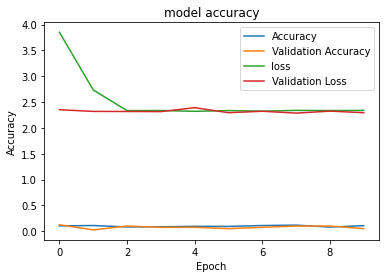

In [36]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()